In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Users/NTC/Downloads/Data Tasks (1)/tasks/task_1/calls_task.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,ACTION_DATE,ACTION_ID,MEMBER_ID,ACTION_TYPE
0,2022-04-10T01:57:30Z,89821691,116778534.0,show_number
1,2022-04-10T02:08:47Z,89915585,110472624.0,show_number
2,2022-04-10T02:31:42Z,90099017,6961446.0,show_number
3,2022-04-05T16:46:39Z,43538787,107681746.0,show_number
4,2022-04-05T17:03:33Z,43670683,108485886.0,show_number


In [28]:
data.tail()

,ACTION_DATE,ACTION_ID,MEMBER_ID,ACTION_TYPE
496723,2022-04-14T18:59:46Z,137134739,118280514.0,show_number
496724,2022-04-14T19:00:08Z,137137555,118280514.0,show_number
496725,2022-04-19T13:57:25Z,187460783,118579286.0,show_number
496726,2022-04-24T16:34:48Z,242643555,118821126.0,show_number
496727,2022-04-29T20:26:06Z,296794047,67680072.0,show_number


In [29]:
data.describe()

,ACTION_ID,MEMBER_ID
count,4.967280e+05,4.962520e+05
mean,1.453999e+08,9.632383e+07
std,7.127076e+07,3.532784e+07
min,1.018500e+04,1.254000e+03
25%,1.124607e+08,9.989845e+07
50%,1.387663e+08,1.131582e+08
75%,1.915923e+08,1.182805e+08
max,3.081690e+08,1.190928e+08


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496728 entries, 0 to 496727
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ACTION_DATE  496728 non-null  object 
 1   ACTION_ID    496728 non-null  int64  
 2   MEMBER_ID    496252 non-null  float64
 3   ACTION_TYPE  496728 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.2+ MB


In [31]:
data.isna().sum()

ACTION_DATE      0
ACTION_ID        0
MEMBER_ID      476
ACTION_TYPE      0
dtype: int64

In [32]:
data.isnull().mean()*100

ACTION_DATE    0.000000
ACTION_ID      0.000000
MEMBER_ID      0.095827
ACTION_TYPE    0.000000
dtype: float64

Trend Analysis

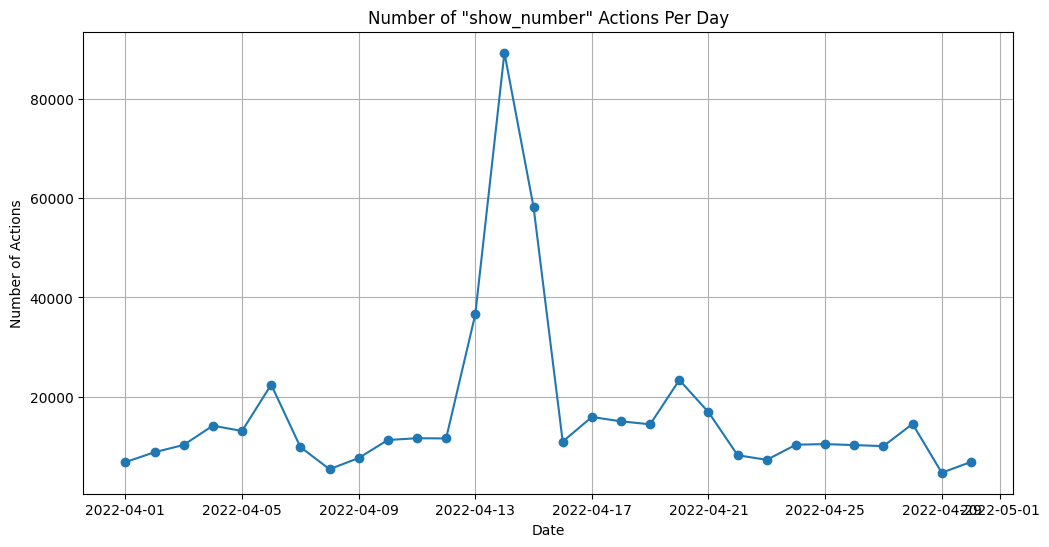

In [38]:
# Convert ACTION_DATE to datetime
data['ACTION_DATE'] = pd.to_datetime(data['ACTION_DATE'])

# Set ACTION_DATE as the index
data.set_index('ACTION_DATE', inplace=True)

# Resample the data by day and count the number of actions per day
daily_actions = data.resample('D').count()['ACTION_ID']

# Plot the number of actions per day
plt.figure(figsize=(12, 6))
plt.plot(daily_actions, marker='o', linestyle='-')
plt.title('Number of "show_number" Actions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Actions')
plt.grid(True)
plt.show()

Daily Patterns

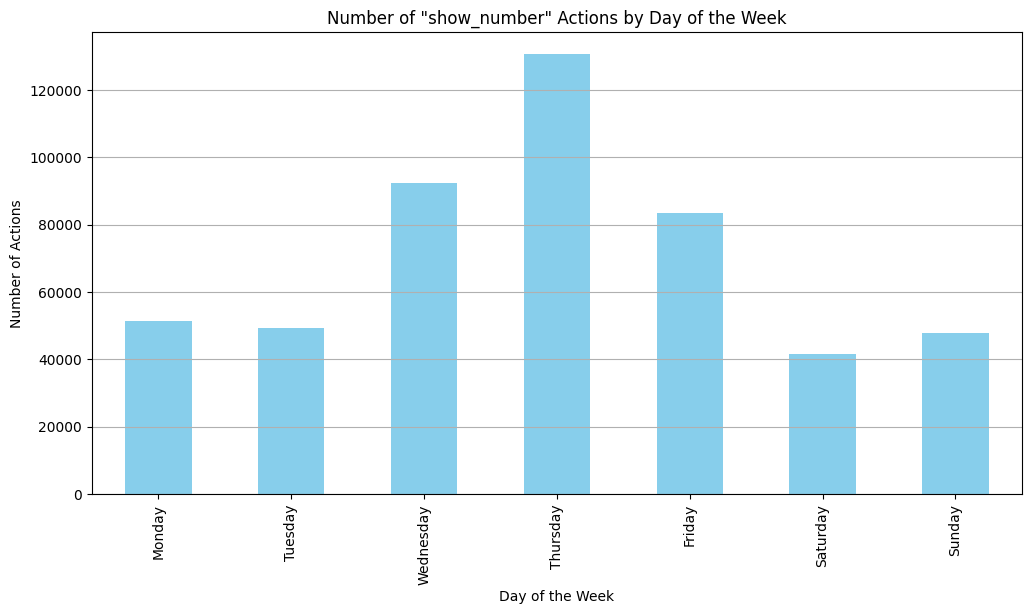

In [43]:

# Extract the day of the week as an integer (0=Monday, 6=Sunday)
data['day_of_week'] = data.index.dayofweek

# Map integer values to day names
day_of_week_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
data['day_of_week'] = data['day_of_week'].map(day_of_week_map)

# Group by the day of the week and count the number of actions
actions_by_day = data.groupby('day_of_week').count()['ACTION_ID']

# Reorder the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
actions_by_day = actions_by_day.reindex(ordered_days)

# Plot the actions by day of the week
plt.figure(figsize=(12, 6))
actions_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of "show_number" Actions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Actions')
plt.grid(axis='y')
plt.show()

Wednesday and Thurusday have the highest number of [show number] actions among other day of the week 

Hourly Patterns

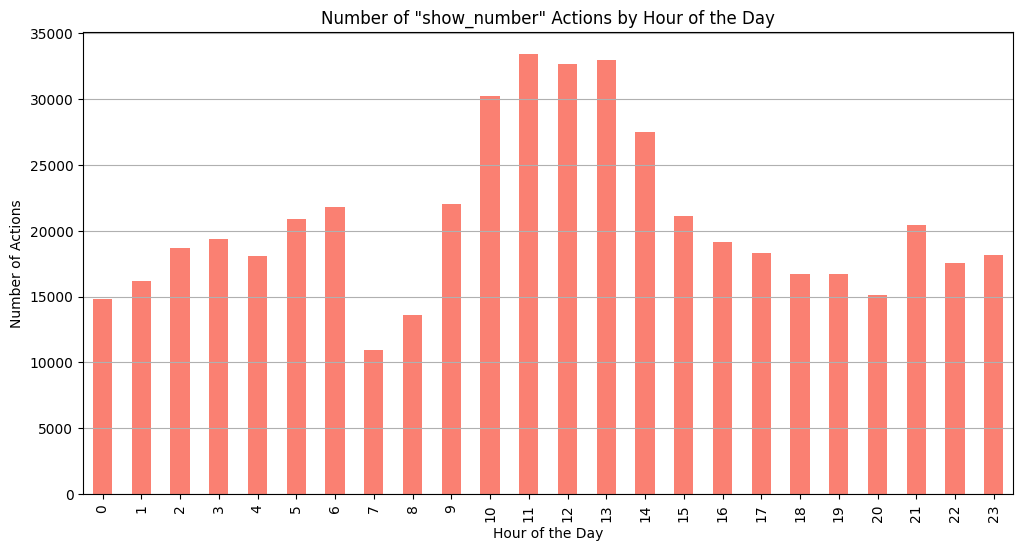

In [40]:
# Extract the hour of the day
data['hour_of_day'] = data.index.hour

# Group by hour of the day and count actions
actions_by_hour = data.groupby('hour_of_day').count()['ACTION_ID']

# Plot the actions by hour of the day
plt.figure(figsize=(12, 6))
actions_by_hour.plot(kind='bar', color='salmon')
plt.title('Number of "show_number" Actions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Actions')
plt.grid(axis='y')
plt.show()

during hour of the day  [10 am to 1 pm ] shows the highest number of [show number] actions among other hours of the day 
especially at 11 am and 12 pm [afternoon period] shows the peak activity of [show number actions ]

Peak Analysis

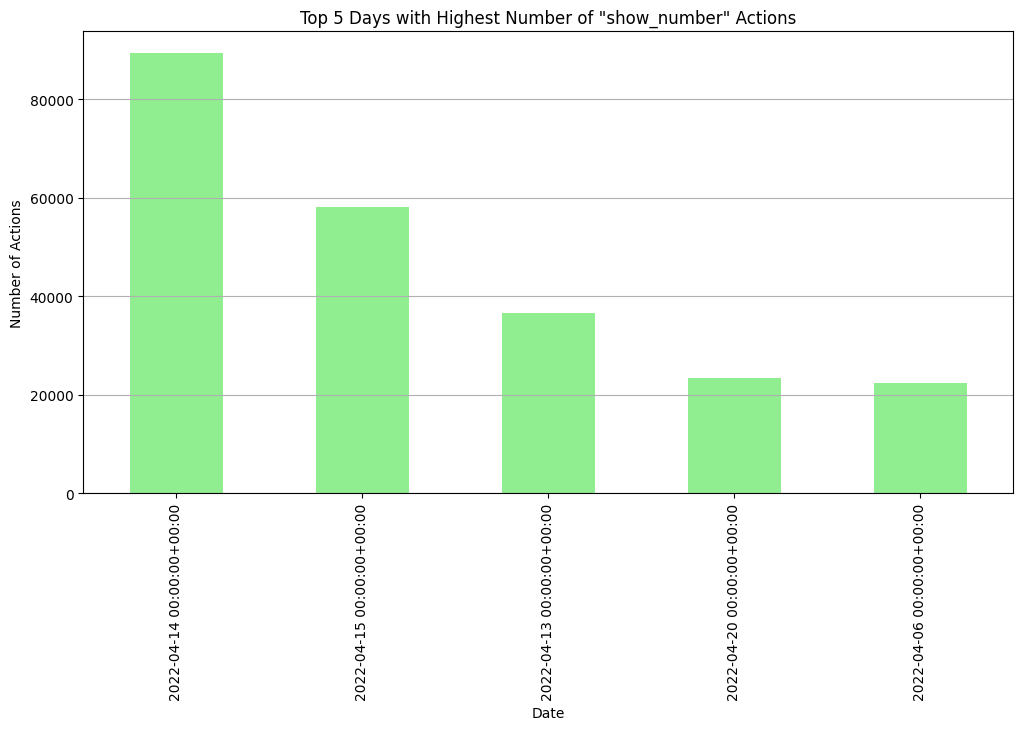

In [41]:
# Find the top 5 days with the highest number of actions
top_days = daily_actions.nlargest(5)

# Plot the top days with the highest number of actions
plt.figure(figsize=(12, 6))
top_days.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Days with Highest Number of "show_number" Actions')
plt.xlabel('Date')
plt.ylabel('Number of Actions')
plt.grid(axis='y')
plt.show()

Top 3 Days with Highest Number of "show_number" Actions is [14-04],[15-04],[13-04] which comes at toward half of month days